<a href="https://www.kaggle.com/code/haiderjan/house-price-prediction?scriptVersionId=104686161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
##Import all the libraries needed to run the project successfully
##Pandas to use for making and manipulating dataframes
import pandas as pd
##Seaborn for plotting purposes
import seaborn as sns
#Matplotlib for plotting purposes
import matplotlib.pyplot as plt

##Numpy for array processing
import numpy as np

from sklearn.model_selection import cross_val_score

##Gradient boosting regressor which will be used as a machine learning model
from sklearn.ensemble import GradientBoostingRegressor

##label encoder for encoding categorical labels with their values
from sklearn.preprocessing import LabelEncoder

#Mean squared error to compute the score of computed from our cross validation data sets
from sklearn.metrics import mean_squared_error 

# #**Read in Our Data**

In [2]:
df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
y_train=df['SalePrice']
test=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
##Drop the Id and Saleprice from the training datasets as Id isnt considered an important feature
train=df.drop(['Id','SalePrice' ],axis=1)

In [4]:
##Doing the same for the test data and dropping Id, we will be predicting the Saleprice for this data
test=test.drop(['Id'], axis=1)

In [5]:
##Concatenate botht the training and testing data for cleaning purposes
X=pd.concat([train,test],ignore_index=True)

# #**Take a Look at Our Data**

In [6]:
#Check the shape of the data
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,NaN
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,NaN
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,NaN
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,NaN


**Observe the feaqtures with null values**

In [7]:
X.info()
X.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2920 non-null   int64  
 1   MSZoning       2920 non-null   object 
 2   LotFrontage    2402 non-null   float64
 3   LotArea        2920 non-null   int64  
 4   Street         2920 non-null   object 
 5   Alley          182 non-null    object 
 6   LotShape       2920 non-null   object 
 7   LandContour    2920 non-null   object 
 8   Utilities      2920 non-null   object 
 9   LotConfig      2920 non-null   object 
 10  LandSlope      2920 non-null   object 
 11  Neighborhood   2920 non-null   object 
 12  Condition1     2920 non-null   object 
 13  Condition2     2920 non-null   object 
 14  BldgType       2920 non-null   object 
 15  HouseStyle     2920 non-null   object 
 16  OverallQual    2920 non-null   int64  
 17  OverallCond    2920 non-null   int64  
 18  YearBuil

MSSubClass          0
MSZoning            0
LotFrontage       518
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1460
Length: 80, dtype: int64

In [8]:
#Fill the null values for categorical features
X['Alley']=X['Alley'].fillna('No')
X['FireplaceQu']=X['FireplaceQu'].fillna('No')
X['PoolQC']=X['PoolQC'].fillna('No')
X['Fence']=X['Fence'].fillna('No')
X['MiscFeature']=X['MiscFeature'].fillna('No')
display(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,2,2008,WD,Normal,NaN
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,5,2007,WD,Normal,NaN
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,9,2008,WD,Normal,NaN
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,2,2006,WD,Abnorml,NaN
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,12,2008,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,8,2007,WD,Normal,175000.0
2916,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,2,2010,WD,Normal,210000.0
2917,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
2918,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,4,2010,WD,Normal,142125.0


# **Get a list of all columns with null values**

In [9]:
cols=[]
for col in X.columns:
    if X[col].isnull().sum()>0:
        cols.append(col)
print(cols)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'SalePrice']


# **Divide this list into two and then read the features out of each list to make reading more easy**

In [10]:
cols1=cols[:int(len(cols)/2)]
print(cols1)
cols2=cols[int(len(cols)/2):]
print(cols2)
display(X[cols1])
display(X[cols2])

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']
['BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'SalePrice']


,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ
1,80.0,None,0.0,Gd,TA,Gd,ALQ
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ
3,60.0,None,0.0,TA,Gd,No,ALQ
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ
...,...,...,...,...,...,...,...
2915,62.0,None,0.0,Gd,TA,No,Unf
2916,85.0,Stone,119.0,Gd,TA,No,ALQ
2917,66.0,None,0.0,TA,Gd,No,GLQ
2918,68.0,None,0.0,TA,TA,Mn,GLQ


,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,SalePrice
0,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA,NaN
1,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA,NaN
2,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA,NaN
3,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA,NaN
4,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA,NaN
...,...,...,...,...,...,...,...,...
2915,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA,175000.0
2916,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA,210000.0
2917,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA,266500.0
2918,Rec,FuseA,Attchd,1950.0,Unf,TA,TA,142125.0


# #**Fill in for missing Values appropriately**

In [11]:
for col in cols:
    if col in ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','GarageArea','BsmtUnfSF','TotalBsmtSF']:
        X[col]=X[col].fillna(X[col].mean())
    if col in ['BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars']:
        X[col]=X[col].fillna(X[col].median())
    else:
        X[col]=X[col].fillna(X[col].mode()[0])
X.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2920 non-null   int64  
 1   MSZoning       2920 non-null   object 
 2   LotFrontage    2920 non-null   float64
 3   LotArea        2920 non-null   int64  
 4   Street         2920 non-null   object 
 5   Alley          2920 non-null   object 
 6   LotShape       2920 non-null   object 
 7   LandContour    2920 non-null   object 
 8   Utilities      2920 non-null   object 
 9   LotConfig      2920 non-null   object 
 10  LandSlope      2920 non-null   object 
 11  Neighborhood   2920 non-null   object 
 12  Condition1     2920 non-null   object 
 13  Condition2     2920 non-null   object 
 14  BldgType       2920 non-null   object 
 15  HouseStyle     2920 non-null   object 
 16  OverallQual    2920 non-null   int64  
 17  OverallCond    2920 non-null   int64  
 18  YearBuil

# **Make a list of all features with data type==object**

In [12]:
cols=[]
dt=[]
for col in X.columns:
    if X[col].dtype=='object':
        cols.append(col)
        dt.append(X[col].dtype)
print(cols)          

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


**Label encode all the categorical features**

In [13]:
LE=LabelEncoder()
for col in cols:
    X[col]=LE.fit_transform(X[col])
display(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,140000.0
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,140000.0
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,140000.0
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000.0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,60,3,62.0,7917,1,1,3,3,0,4,...,0,3,4,1,0,8,2007,8,4,175000.0
2916,20,3,85.0,13175,1,1,3,3,0,4,...,0,3,2,1,0,2,2010,8,4,210000.0
2917,70,3,66.0,9042,1,1,3,3,0,4,...,0,3,0,3,2500,5,2010,8,4,266500.0
2918,20,3,68.0,9717,1,1,3,3,0,4,...,0,3,4,1,0,4,2010,8,4,142125.0


# #**Observe the distributions of all features**

<function matplotlib.pyplot.show(close=None, block=None)>

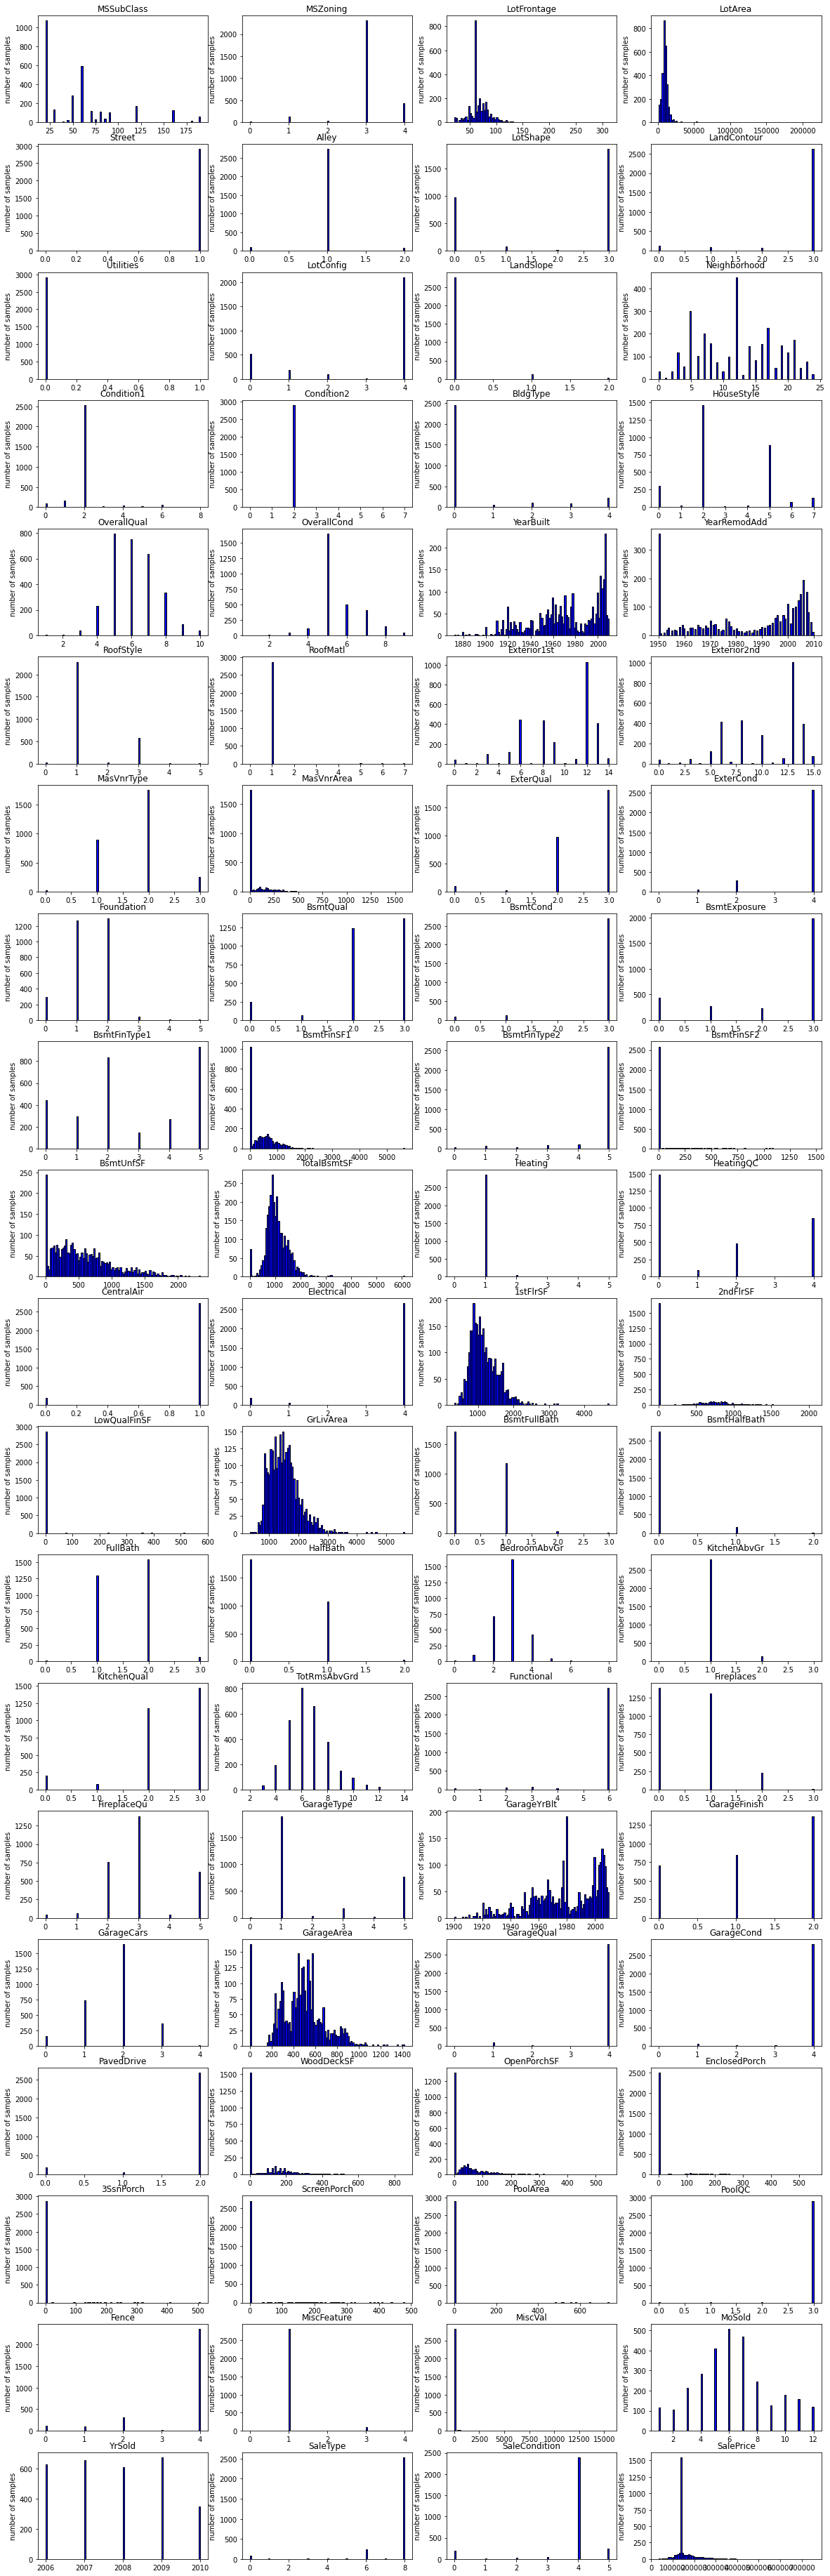

In [14]:
fig=plt.figure(figsize=(20,70))
for i in range(1,X.shape[1]+1):
    ax=fig.add_subplot(int(X.shape[1]/4)+1,4,i)
    ax.set_title(X.columns[i-1])
    ax.set_ylabel('number of samples')
    ax.hist(X[X.columns[i-1]],bins=100,ec='black',color='b')
plt.show

# #**Dropping redundant features**

Looking at the Distribution of each of the feature in the dataset, we cana easily drop some. Below in the code are some of the features I dropped due to obvious reasones mainly because the outcome of the feature was same more or less for all the samples, the variance is extremely low and so there is no information for the model to extract from that feature so its better that we completely eliminate them.

Ypu can also take a look at these features for yourselves and test out for different cases.

In [15]:
##Dropping Features which we deem un necessary
X=X.drop(['Street','Utilities','Condition2','RoofMatl','BsmtFinSF2','Heating','LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscFeature','MiscVal',],axis=1)
##Getting the training data from the total concatenated data 
X_train=X.iloc[:train.shape[0],:]
X_test=X.iloc[train.shape[0]:,:]
display(X_train)
display(X_test)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,4,0,5,...,2,0,61,0,4,2,2008,8,4,140000.0
1,20,3,80.0,9600,1,3,3,2,0,24,...,2,298,0,0,4,5,2007,8,4,140000.0
2,60,3,68.0,11250,1,0,3,4,0,5,...,2,0,42,0,4,9,2008,8,4,140000.0
3,70,3,60.0,9550,1,0,3,0,0,6,...,2,0,35,272,4,2,2006,8,0,140000.0
4,60,3,84.0,14260,1,0,3,2,0,15,...,2,192,84,0,4,12,2008,8,4,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,4,0,8,...,2,0,40,0,4,8,2007,8,4,140000.0
1456,20,3,85.0,13175,1,3,3,4,0,14,...,2,349,0,0,2,2,2010,8,4,140000.0
1457,70,3,66.0,9042,1,3,3,4,0,6,...,2,0,60,0,0,5,2010,8,4,140000.0
1458,20,3,68.0,9717,1,3,3,4,0,12,...,2,366,0,112,4,4,2010,8,4,140000.0


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,60,3,65.0,8450,1,3,3,4,0,5,...,2,0,61,0,4,2,2008,8,4,208500.0
1461,20,3,80.0,9600,1,3,3,2,0,24,...,2,298,0,0,4,5,2007,8,4,181500.0
1462,60,3,68.0,11250,1,0,3,4,0,5,...,2,0,42,0,4,9,2008,8,4,223500.0
1463,70,3,60.0,9550,1,0,3,0,0,6,...,2,0,35,272,4,2,2006,8,0,140000.0
1464,60,3,84.0,14260,1,0,3,2,0,15,...,2,192,84,0,4,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,60,3,62.0,7917,1,3,3,4,0,8,...,2,0,40,0,4,8,2007,8,4,175000.0
2916,20,3,85.0,13175,1,3,3,4,0,14,...,2,349,0,0,2,2,2010,8,4,210000.0
2917,70,3,66.0,9042,1,3,3,4,0,6,...,2,0,60,0,0,5,2010,8,4,266500.0
2918,20,3,68.0,9717,1,3,3,4,0,12,...,2,366,0,112,4,4,2010,8,4,142125.0


# # **Distribution of Label (SalePrice)**

We observe that the distribution here is kind of skewed, we will apply a traqnsofrmation in the coming code blocks and then view the statistical features

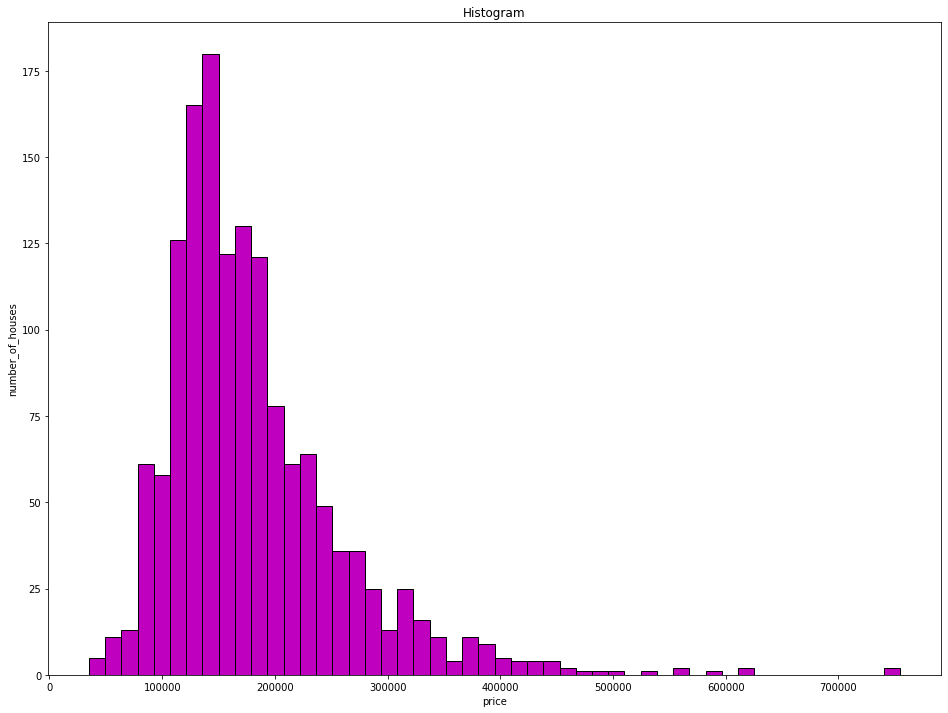

Mean: 180921.19589041095
Variance: 6311111264.297448
Median: 163000.0
Min: 34900
Max: 755000


In [16]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Histogram')
ax.set_xlabel('price')
ax.set_ylabel('number_of_houses')
ax.hist(y_train,bins=50,ec='black',color='m')
plt.show()
print('Mean:',y_train.mean())
print('Variance:',y_train.var())
print('Median:',y_train.median())
print('Min:',y_train.min())
print('Max:',y_train.max())

**Getting the statistical knowledge about the label**

Changing the distribution shape to log distribution and finding the statistical frequentist values of the resulting log distribution, this looks more like a normal distribution now
1. Mean
2. Median
3. Variance
4. Min
5. Max


Distribution of Label Log(SalePrice)

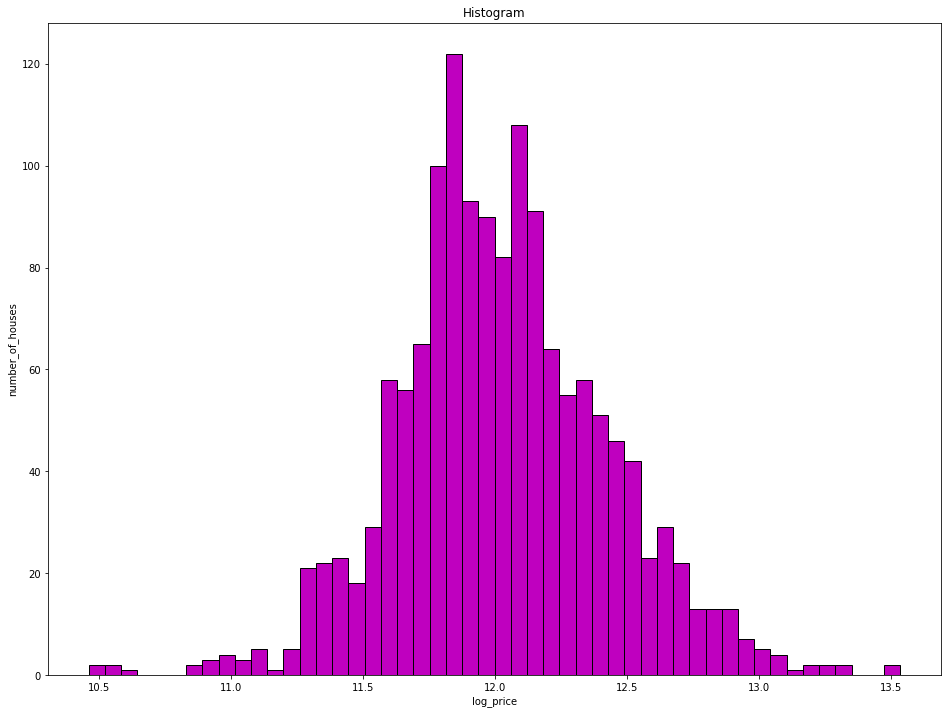

Mean: 12.024050901109383
Variance: 0.15956179505733453
Median: 12.0015054797889
Min: 10.460242108190519
Max: 13.534473028231162


In [17]:
y_train=np.log(y_train)
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Histogram')
ax.set_xlabel('log_price')
ax.set_ylabel('number_of_houses')
ax.hist(y_train,bins=50,ec='black',color='m')
plt.show()
print('Mean:',y_train.mean())
print('Variance:',y_train.var())
print('Median:',y_train.median())
print('Min:',y_train.min())
print('Max:',y_train.max())

****

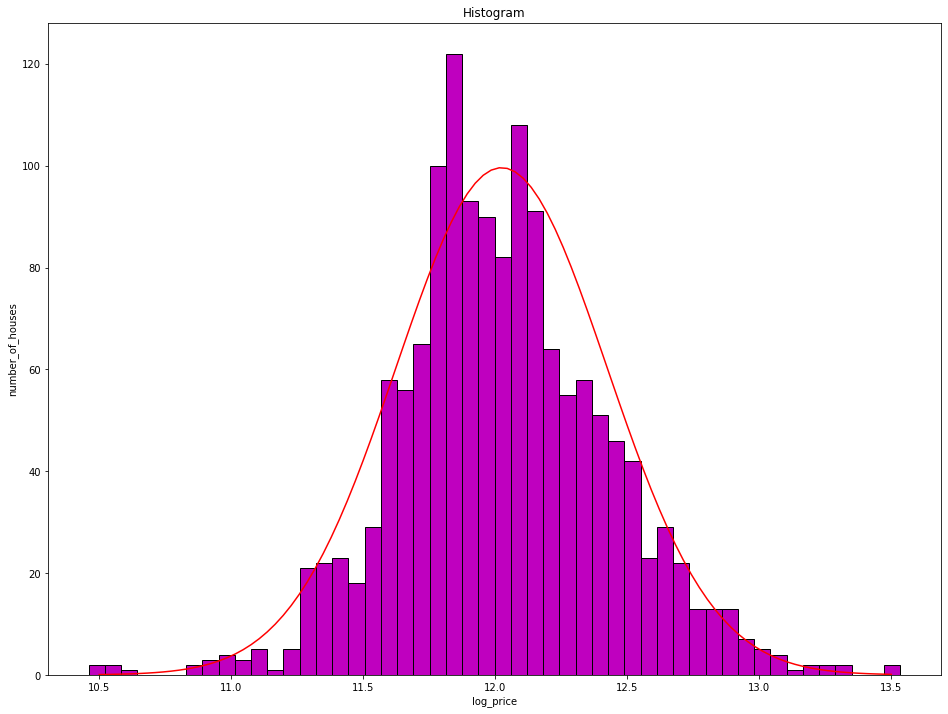

In [18]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Histogram')
ax.set_xlabel('log_price')
ax.set_ylabel('number_of_houses')
ax.hist(y_train,bins=50,ec='black',color='m')
x=np.linspace(10.5,13.5,100)
y=250*(1/(2*np.pi*y_train.var()**0.5))*np.exp(-((x-y_train.mean())**2)/(2*y_train.var()))
ax.plot(x,y,color='r')
plt.show()

##Fitting a line to our distribution just for fun, doesnt it look nice??

# #**Preparing Splits**

1. Splits created using the training Data
2. 5% of the training data is used for the validation data
3. The split is done using a random stratified sampling technique

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=0)
display(X_train)
display(X_val)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
688,20,3,60.0,8089,1,3,1,4,0,22,...,2,140,0,0,4,10,2007,6,5,140000.0
1122,20,3,60.0,8926,1,0,3,0,0,7,...,2,64,0,0,2,10,2009,0,0,140000.0
866,20,3,67.0,10656,1,0,1,4,0,23,...,2,192,80,0,4,11,2007,6,5,140000.0
1214,85,3,69.0,10205,1,0,3,4,0,12,...,2,150,72,0,4,5,2006,8,4,140000.0
589,40,4,50.0,9100,1,3,3,4,0,3,...,1,0,0,0,4,8,2008,8,4,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,3,82.0,9430,1,3,3,4,0,15,...,2,0,128,0,4,7,2009,8,4,140000.0
835,20,3,60.0,9600,1,3,3,4,0,19,...,2,290,0,0,4,2,2010,8,4,140000.0
1216,90,4,68.0,8930,1,3,3,4,0,19,...,2,0,0,0,4,4,2010,8,4,140000.0
559,120,3,60.0,3196,1,3,3,4,0,0,...,2,143,20,0,4,10,2006,8,4,140000.0


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
529,20,3,60.0,32668,1,0,3,1,0,6,...,2,0,0,200,4,3,2007,8,2,140000.0
491,50,3,79.0,9490,1,3,3,4,0,12,...,2,0,0,32,2,8,2006,8,4,140000.0
459,50,3,60.0,7015,1,0,0,0,0,3,...,2,0,0,248,4,7,2009,8,4,140000.0
279,60,3,83.0,10005,1,3,3,4,0,4,...,2,288,117,0,4,3,2008,8,4,140000.0
655,160,4,21.0,1680,1,3,3,4,0,2,...,2,0,0,0,4,3,2010,8,3,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,50,3,53.0,5362,1,3,3,0,0,6,...,2,242,0,81,4,11,2007,8,4,140000.0
822,60,3,60.0,12394,1,0,3,0,0,8,...,2,100,48,0,4,10,2007,8,3,140000.0
315,60,3,71.0,7795,1,0,3,4,0,8,...,2,100,51,0,4,7,2009,8,4,140000.0
9,190,3,50.0,7420,1,3,3,0,0,3,...,2,0,4,0,4,1,2008,8,4,140000.0


# #**Training the GB regressor Model**
The Mean Squared Errors for the training and validation set is shown below, one fantastic thing about the GB regressor library is that we can get our feature importances scores from the model. This gives us an insight into how each feature plays part in contributing to predict the SalePrice



In [20]:
Model=GradientBoostingRegressor(learning_rate=0.03,max_depth=5,max_features=6,n_estimators=1800,random_state=0).fit(X_train,y_train)
print('Train mse:',mean_squared_error(y_train,Model.predict(X_train)))
print('Val mse:',mean_squared_error(y_val,Model.predict(X_val)))
fi=dict(zip(X_train.columns,Model.feature_importances_))
Fi=pd.DataFrame(index=fi.keys(),data=fi.values(),columns=['Importance'])
display(Fi)
print('Least important features:')
display(Fi.sort_values(by='Importance').iloc[:6])
print('Most important features:')
display(Fi.sort_values(by='Importance').iloc[-6:])

Train mse: 8.582226378754762e-05
Val mse: 0.011637959095894417


,Importance
MSSubClass,0.006058
MSZoning,0.010615
LotFrontage,0.006750
LotArea,0.026453
Alley,0.000654
...,...
MoSold,0.002029
YrSold,0.000862
SaleType,0.001100
SaleCondition,0.004482


Least important features:


,Importance
SalePrice,0.000000
BsmtHalfBath,0.000373
BsmtFinType2,0.000403
LotConfig,0.000419
GarageCond,0.000458
GarageQual,0.000521


Most important features:


,Importance
GarageYrBlt,0.050670
GarageFinish,0.053470
TotalBsmtSF,0.057656
GarageCars,0.076161
GrLivArea,0.092303
OverallQual,0.107613


In [21]:
X_train=X_train.drop(Fi.sort_values(by='Importance').iloc[:6].index,axis=1)
X_val=X_val.drop(Fi.sort_values(by='Importance').iloc[:6].index,axis=1)
X_test=X_test.drop(Fi.sort_values(by='Importance').iloc[:6].index,axis=1)
Model_=GradientBoostingRegressor(learning_rate=0.03,max_depth=5,max_features=6,n_estimators=1800,random_state=0).fit(X_train,y_train)
print('Train mse:',mean_squared_error(y_train,Model_.predict(X_train)))
print('Val mse:',mean_squared_error(y_val,Model_.predict(X_val)))
fi=dict(zip(X_train.columns,Model_.feature_importances_))
Fi=pd.DataFrame(index=fi.keys(),data=fi.values(),columns=['Importance'])
display(Fi)
print('Least important features:')
display(Fi.sort_values(by='Importance').iloc[:6])
print('Most important features:')
display(Fi.sort_values(by='Importance').iloc[-6:])
y_pred=Model_.predict(X_test)

Train mse: 7.885952233097727e-05
Val mse: 0.012322485565169775


,Importance
MSSubClass,0.008534
MSZoning,0.008565
LotFrontage,0.006291
LotArea,0.033158
Alley,0.000688
...,...
Fence,0.001028
MoSold,0.002150
YrSold,0.001066
SaleType,0.000515


Least important features:


,Importance
KitchenAbvGr,0.000464
SaleType,0.000515
Alley,0.000688
BsmtCond,0.000792
MasVnrType,0.000973
Fence,0.001028


Most important features:


,Importance
YearBuilt,0.044171
GarageCars,0.044404
ExterQual,0.051686
TotalBsmtSF,0.086590
GrLivArea,0.125033
OverallQual,0.133487


In [22]:
fg=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
fg=fg.pop('Id')
fg= fg.astype(np.int64)
submission= pd.DataFrame(np.exp(y_pred), columns = ['SalePrice'])

submission['Id']=fg

submission.to_csv('./submission.csv',index=False)
submission.head()

,SalePrice,Id
0,206708.168259,1461.0
1,181374.723376,1462.0
2,222365.194506,1463.0
3,140105.107888,1464.0
4,296429.806412,1465.0


In [23]:
submission=submission[['Id','SalePrice']]
submission.to_csv('./submission.csv',index=False)


In [24]:
f=pd.read_csv('submission.csv')
f.head()
f['Id'].dtype

dtype('float64')